# Imports

In [56]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather the Data

[Source: Boston Research Papers]('facebook.com')

In [4]:
boston_dataset = load_boston()

dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Target variables (Dependent Variables) in (000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data Exploration with Pandas DataFrame

In [7]:
# Create a Pandas DataFrame
data = DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [8]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualizing Data - Histograms, Distributions and Bar Charts

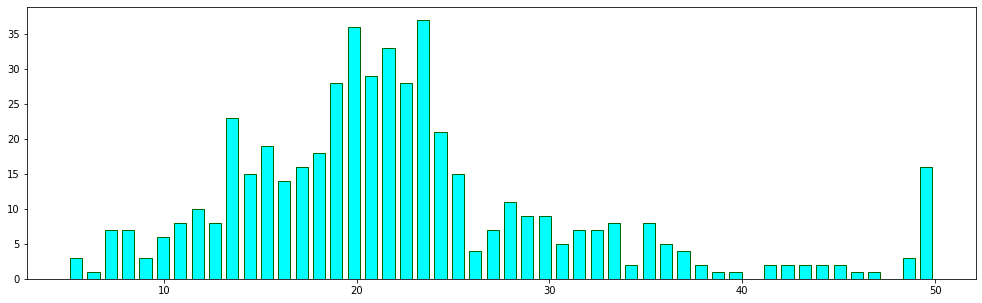

In [10]:
plt.figure(figsize=[17, 5])
plt.hist(data["PRICE"], edgecolor='darkgreen', bins=50, color='cyan', rwidth=0.7)

plt.show()

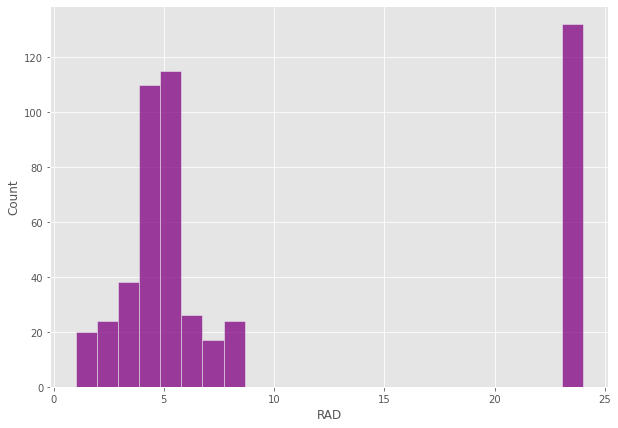

In [11]:
plt.figure(figsize=[10, 7])
plt.style.use("ggplot")
sns.histplot(data.RAD, bins=24, color='purple')

plt.show()

In [12]:
data.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

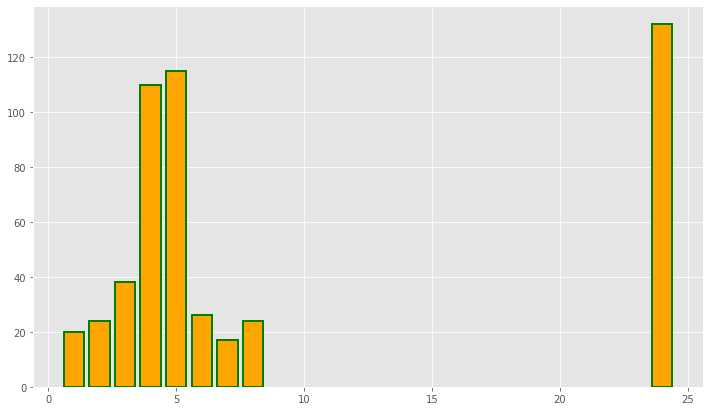

In [13]:
plt.figure(figsize=[12, 7])
frequency = data.RAD.value_counts()
plt.bar(frequency.index, height=frequency, color='orange', edgecolor='green', linewidth=2)

plt.show()

# Correlation
## $$ \rho _{XY} = corr(X, Y) $$
## $$ -1.0 \leq \rho XY \leq + 1.0 $$

In [14]:
# Correlation between the House Prices and AVerage Number of rooms
data["PRICE"].corr(data['RM'])

0.6953599470715396

In [15]:
# Correlation between the property prices and the pupil teacher ratio
data["PRICE"].corr(data["PTRATIO"])

-0.5077866855375621

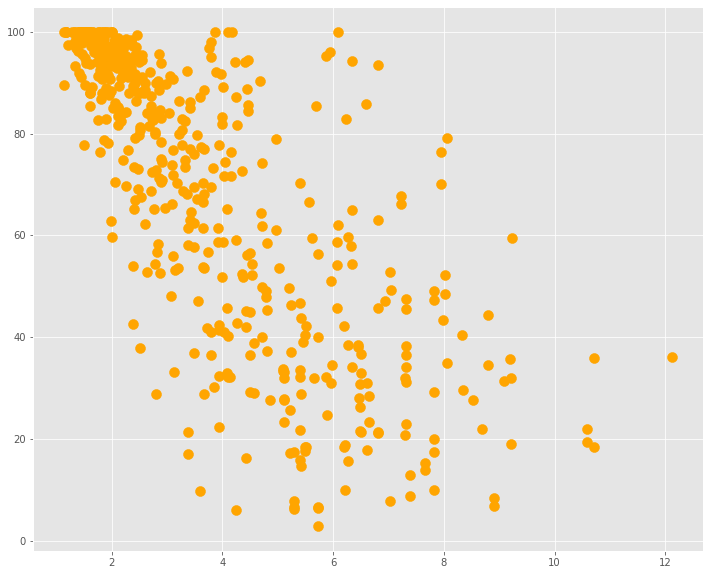

In [16]:
plt.figure(figsize=[12, 10])
plt.scatter(data["DIS"], data["AGE"], s=100, color="orange")
plt.show()

In [17]:
data["AGE"].corr(data["DIS"])

-0.7478805408686319

In [18]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [19]:
mask = np.zeros_like(data.corr())
triangle_mask = np.triu_indices_from(mask)
mask[triangle_mask] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

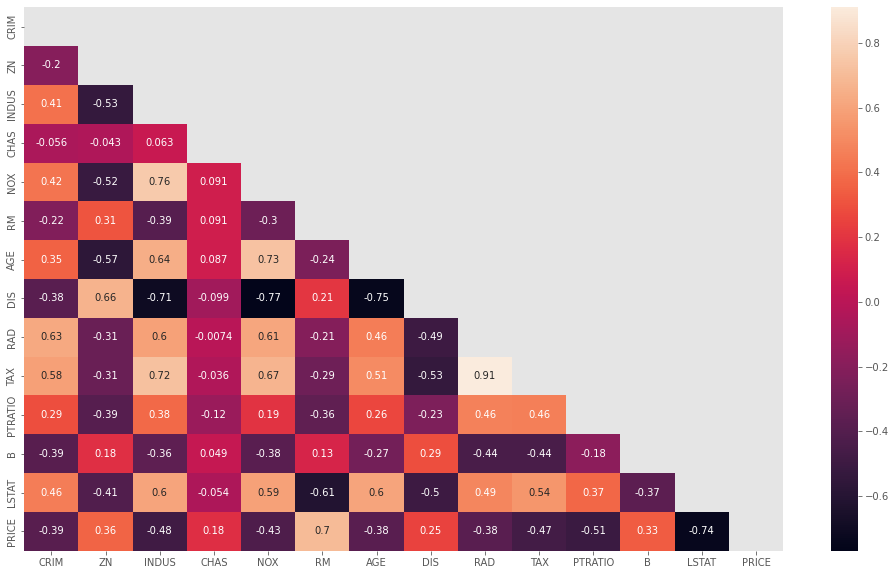

In [20]:
plt.figure(figsize=[17, 10])
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

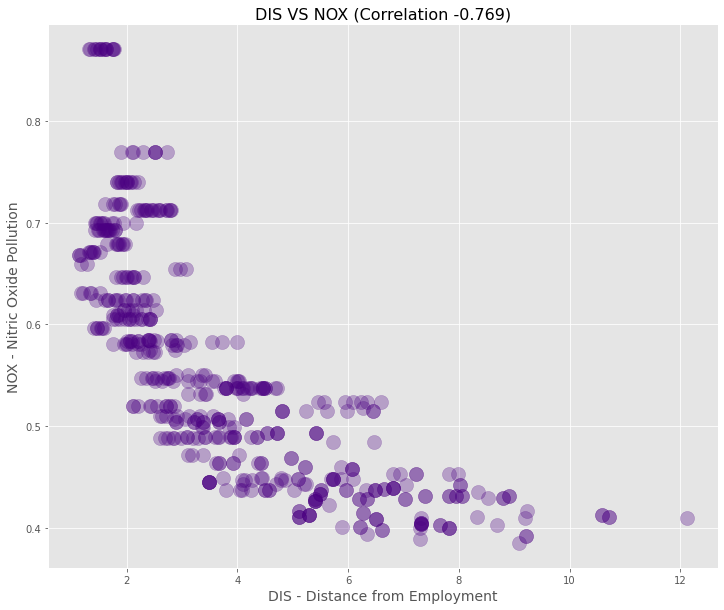

In [21]:
plt.figure(figsize=[12, 10])
dis_nox_corr = data["DIS"].corr(data["NOX"])
plt.scatter(data["DIS"], data["NOX"], s=200, color="indigo", alpha=0.3)

plt.title(f"DIS VS NOX (Correlation {round(dis_nox_corr, 3)})", fontsize=16)
plt.xlabel("DIS - Distance from Employment", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Pollution", fontsize=14)

plt.show()

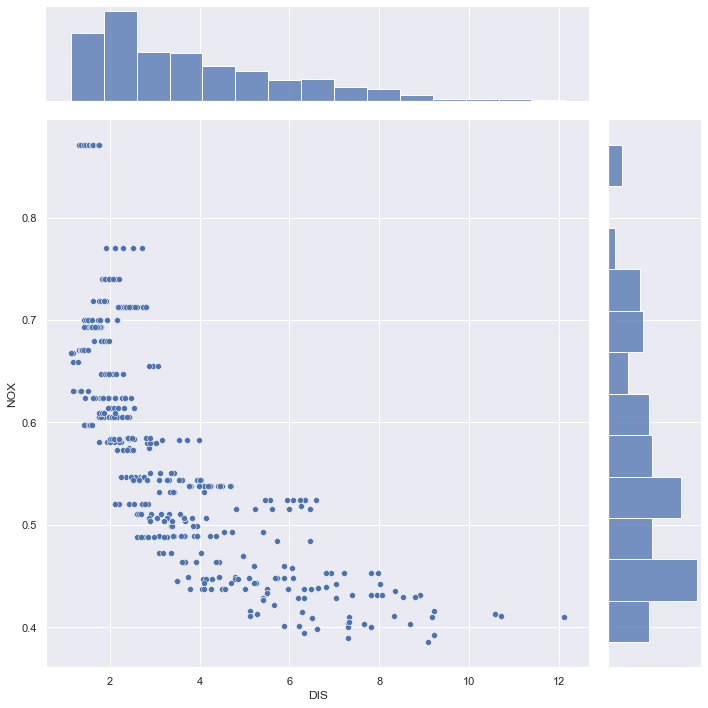

In [22]:
sns.set()
sns.jointplot(x=data["DIS"], y=data["NOX"], height=10)
plt.show()

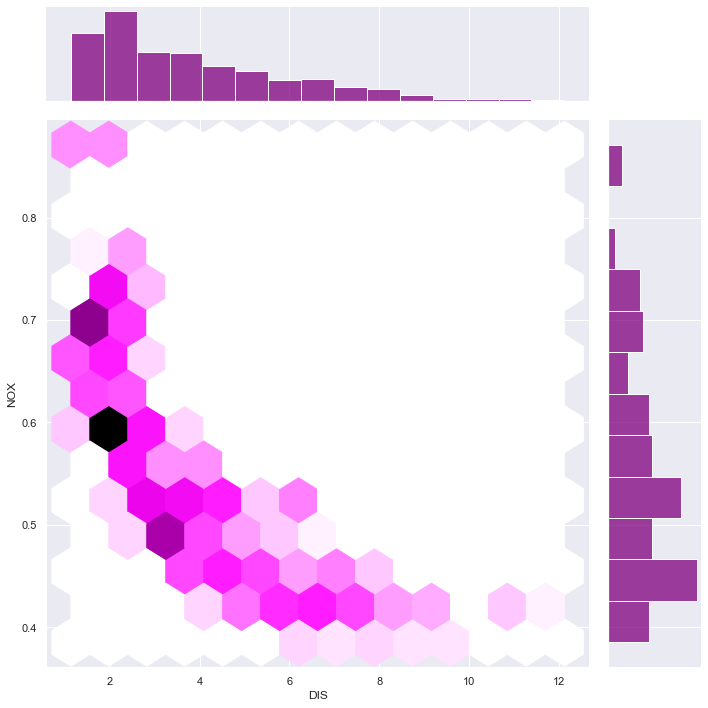

In [23]:
sns.set()
sns.jointplot(x=data["DIS"], y=data["NOX"], height=10, kind='hex', color='purple')
plt.show()

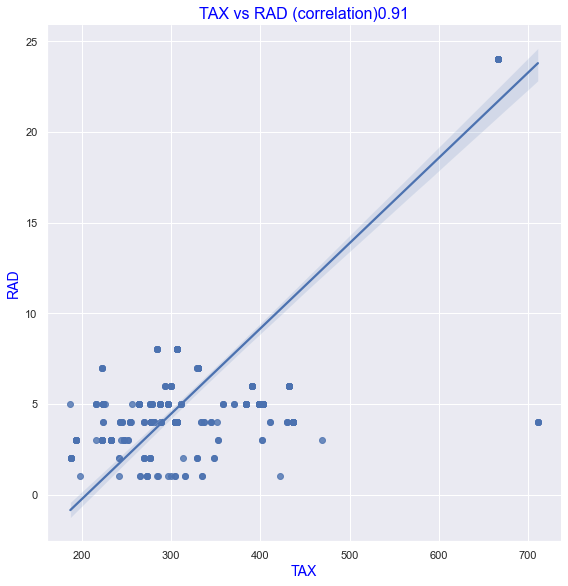

In [24]:
sns.set()
sns.lmplot(x="TAX", y="RAD", data=data, height=8)
tax_rad_corr = data["TAX"].corr(data["RAD"])
plt.title(f"TAX vs RAD (correlation){round(tax_rad_corr, 3)}", fontsize=16, color="blue")
plt.xlabel("TAX", color="blue", fontsize=14)
plt.ylabel("RAD", color="blue", fontsize=14)

plt.show()

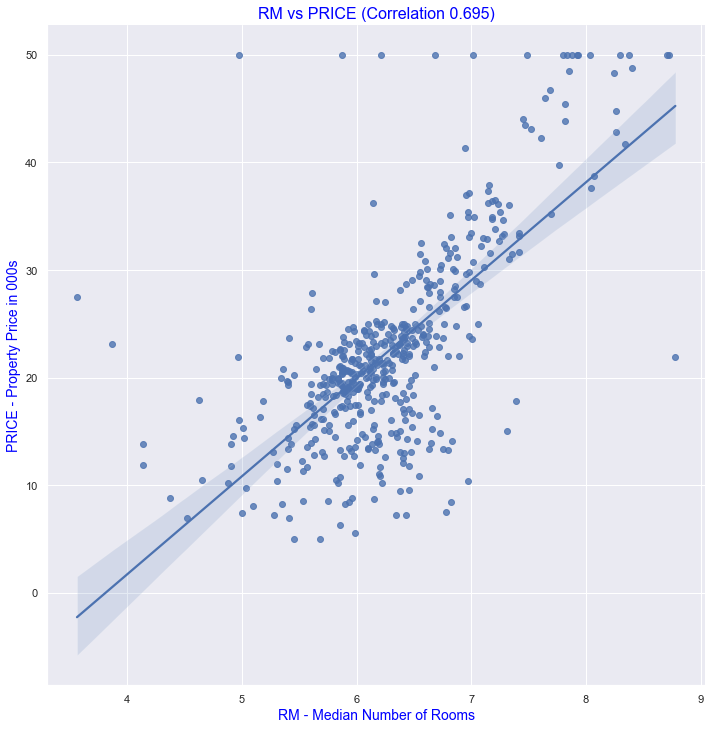

In [25]:
sns.set()
rm_price_corr = data["RM"].corr(data["PRICE"])
sns.lmplot(x="RM", y="PRICE", data=data, height=10)
plt.title(f"RM vs PRICE (Correlation {round(rm_price_corr, 3)})", color='blue', fontsize=16)
plt.xlabel("RM - Median Number of Rooms", fontsize=14, color="blue")
plt.ylabel("PRICE - Property Price in 000s", fontsize=14, color="blue")
plt.show()

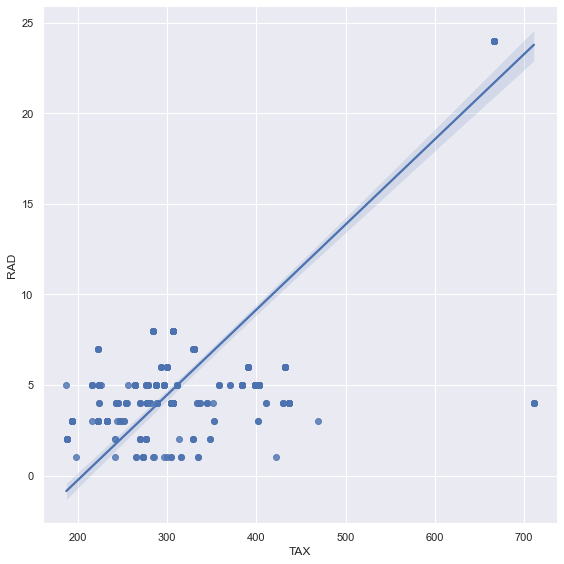

In [26]:
sns.set()
sns.lmplot(x="TAX", y="RAD", data=data, height=8)
plt.show()

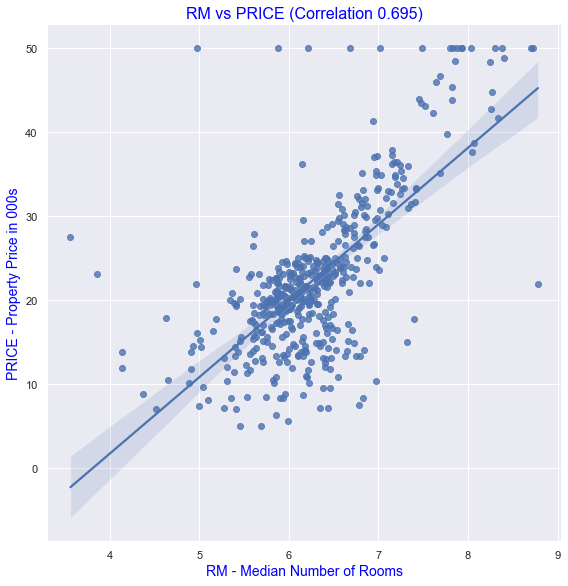

In [27]:
# Scatter plot between House prices and number rooms RM
price_rm_corr = data["RM"].corr(data["PRICE"])
sns.lmplot(x="RM", y="PRICE", data=data, height=8)
plt.title(f"RM vs PRICE (Correlation {round(price_rm_corr, 3)})", fontsize=16, color='blue')
plt.xlabel("RM - Median Number of Rooms", fontsize=14, color='blue')
plt.ylabel("PRICE - Property Price in 000s", fontsize=14, color='blue')

plt.show()

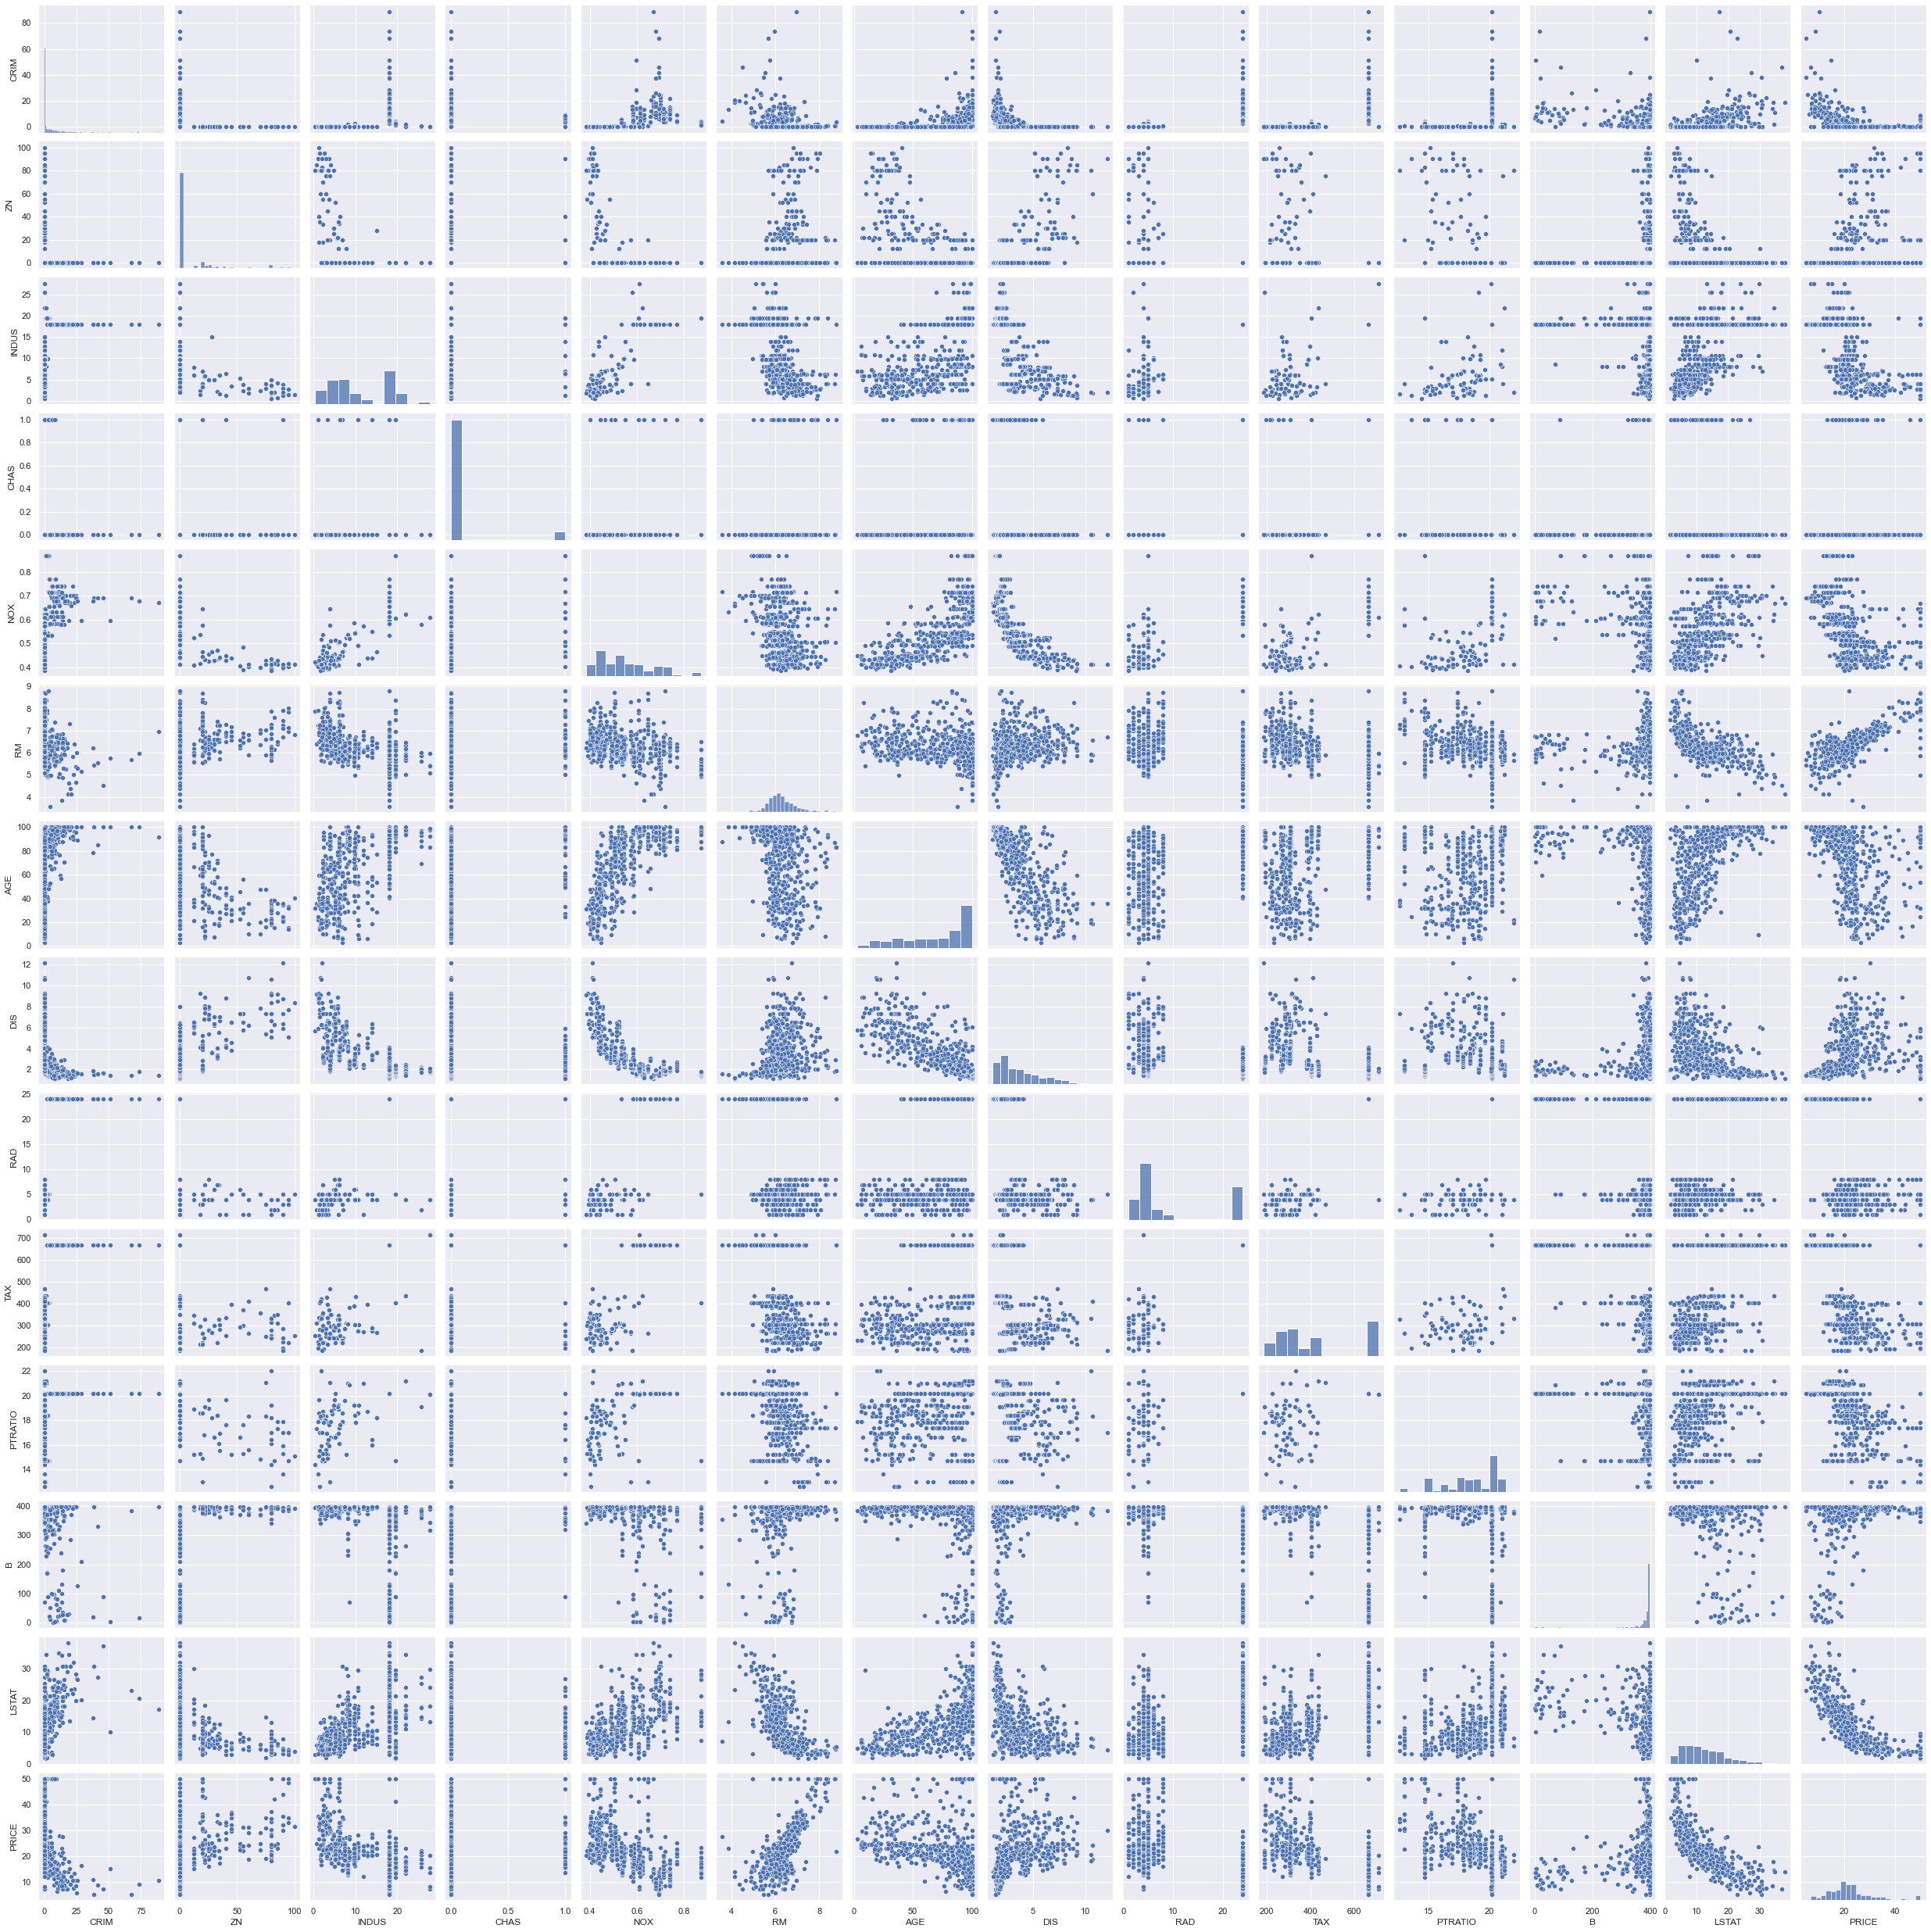

Wall time: 1min 8s


In [28]:
%%time
sns.pairplot(data)
plt.show()

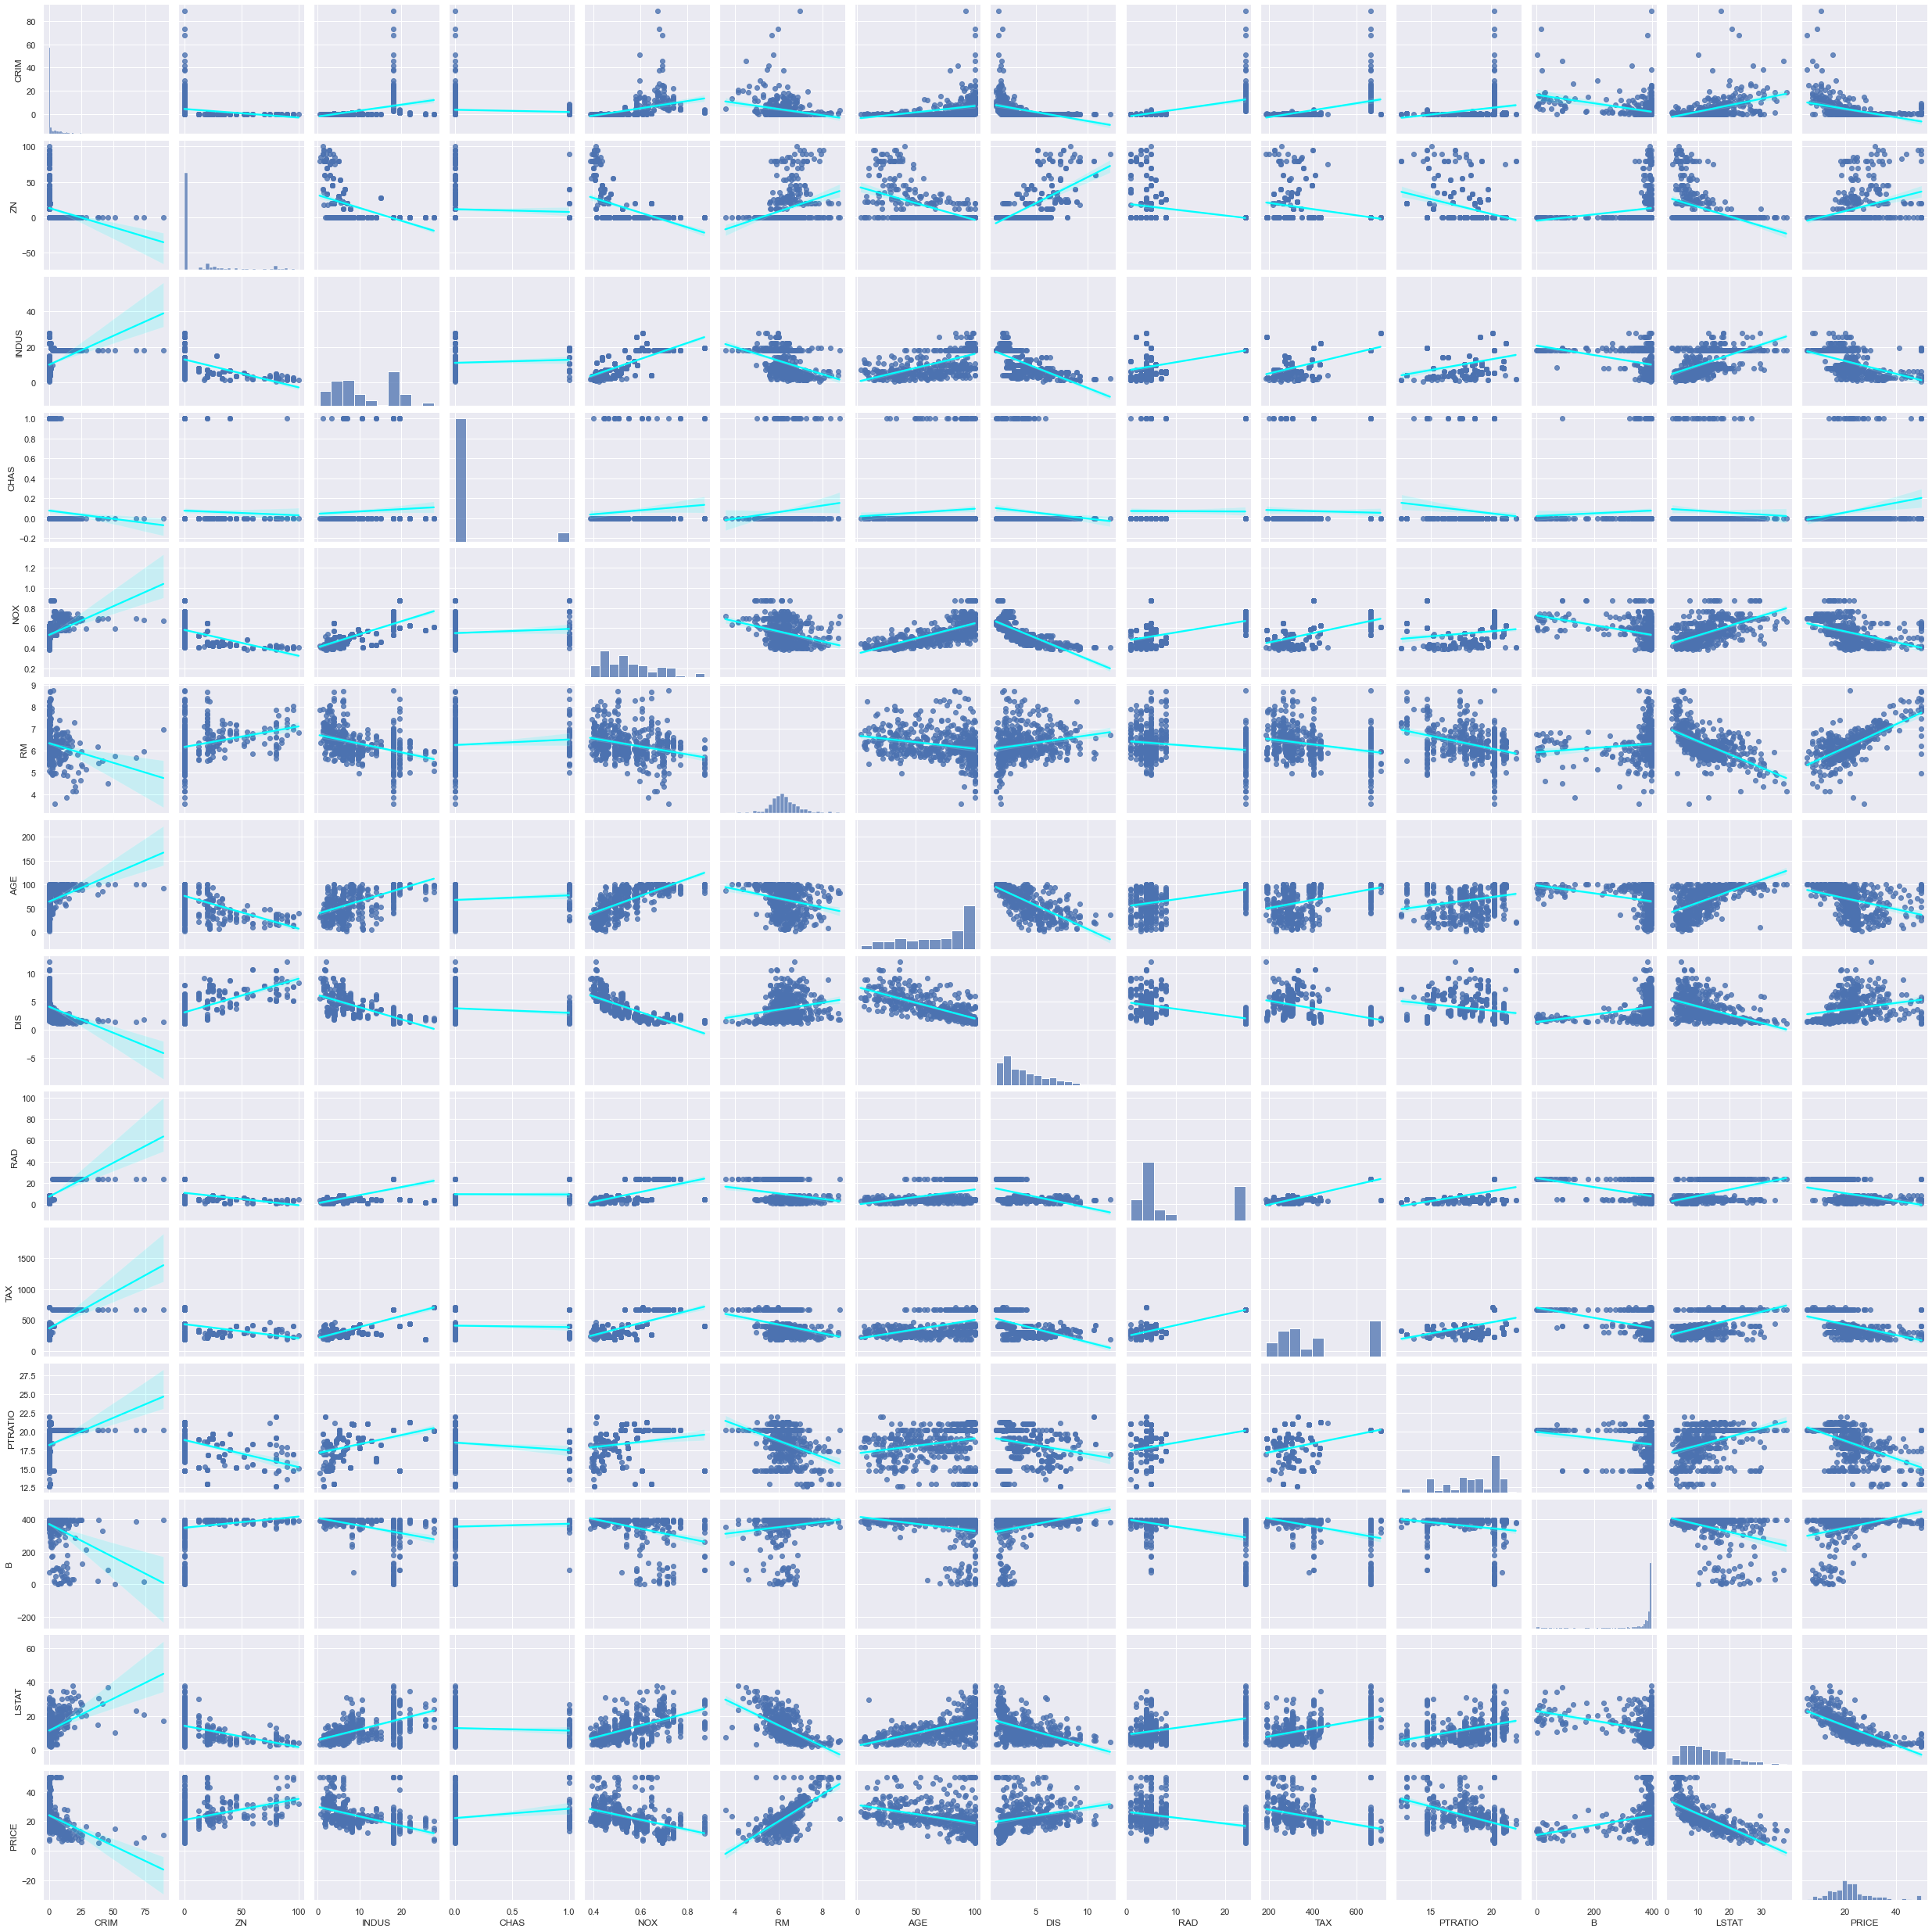

Wall time: 1min 58s


In [29]:
%%time
sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color": "cyan"}})
plt.show()

# Training and Test Dataset Split

In [30]:
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Percentage of Training set
len(x_train)/len(features)

0.7984189723320159

In [31]:
# Percentage of Testing set
len(x_test)/len(features)

0.2015810276679842

In [32]:
# Running Linear Regression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [33]:
print("Training data r-squared: ", regr.score(x_train, y_train))
print("Testing Data r-sqaured: ", regr.score(x_test, y_test))
print("Intercept: ", regr.intercept_)
DataFrame(regr.coef_, index=x_train.columns, columns=["coef_"])

Training data r-squared:  0.750121534530608
Testing Data r-sqaured:  0.6709339839115637
Intercept:  36.53305138282457


coef_
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

# Data Transformationn

In [34]:
y_log = np.log(data["PRICE"])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

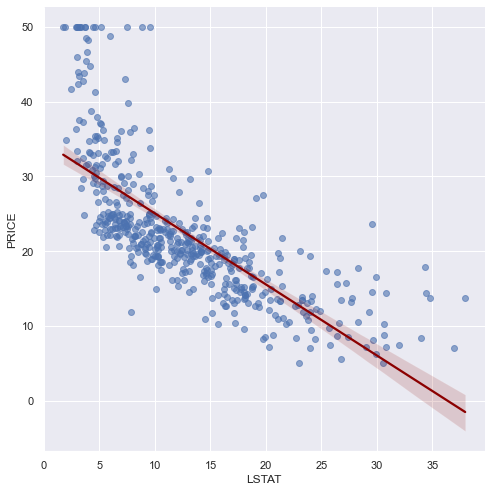

In [35]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, height=7, scatter_kws={'alpha': 0.6}, line_kws={"color": "darkred"})
plt.show()

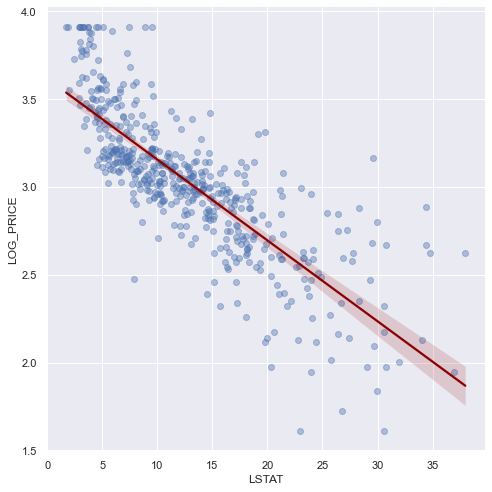

In [36]:
# Adding the log Price data to features dataframe as new column
transformed_data = features
transformed_data["LOG_PRICE"] = y_log

# Plotting the log Price data
sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, height=7, scatter_kws={"alpha": 0.4}, line_kws={"color": "darkred"})
plt.show()

# Regression using log Prices

In [37]:
prices = np.log(data["PRICE"]) # Use of Log Prices
features = data.drop("PRICE", axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Running Linear Regression
regr = LinearRegression()
regr.fit(x_train, y_train)

print("Training data r-squared: ", regr.score(x_train, y_train))
print("Testing Data r-sqaured: ", regr.score(x_test, y_test))
print("Intercept: ", regr.intercept_)

DataFrame(data=regr.coef_, index=x_train.columns, columns=["coef"])

Training data r-squared:  0.7930234826697583
Testing Data r-sqaured:  0.7446922306260745
Intercept:  4.059943871775209


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

# P-values and Evaluating coeficeints

In [38]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

# Testing for Multicollinearity 

$$ TAX = \alpha_0 + \alpha_1RM + \alpha_2NOX +... +\alpha_12LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1 - R^2_{TAX})} $$

In [39]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932485

In [40]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=x) for x in range(x_incl_const.columns.size)]

DataFrame({"coef_Names": x_incl_const.columns, "VIF": np.around(vif, 2)})

coef_Names     VIF
0       const  597.55
1        CRIM    1.71
2          ZN    2.33
3       INDUS    3.94
4        CHAS    1.08
5         NOX    4.41
6          RM    1.84
7         AGE    3.33
8         DIS    4.22
9         RAD    7.31
10        TAX    8.51
11    PTRATIO    1.84
12          B    1.34
13      LSTAT    2.81

# Model Simplification & the Baysian Information Criterion (BIC)

In [41]:
# Original Model with log prices and all features
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

orig_coef = DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

print("BIC is:", results.bic)
print("R-squared is:", results.rsquared)

BIC is: -139.74997769478875
R-squared is: 0.7930234826697582


In [42]:
# Original Model #1 Excluding INDUS 
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop("INDUS", axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_excl_indus = DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

print("BIC is:", results.bic)
print("R-squared is:", results.rsquared)

BIC is: -145.14508855591163
R-squared is: 0.7927126289415163


In [43]:
# Original Model #1 Excluding INDUS and AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

reduced_coef = DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

print("BIC is:", results.bic)
print("R-squared is:", results.rsquared)

BIC is: -149.49934294224678
R-squared is: 0.7918657661852816


In [44]:
frames = [orig_coef, coef_excl_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

# Residuals and residual plots

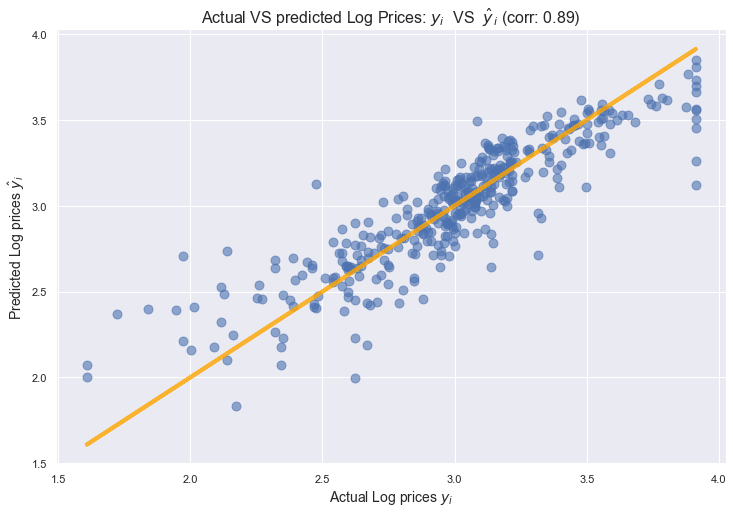

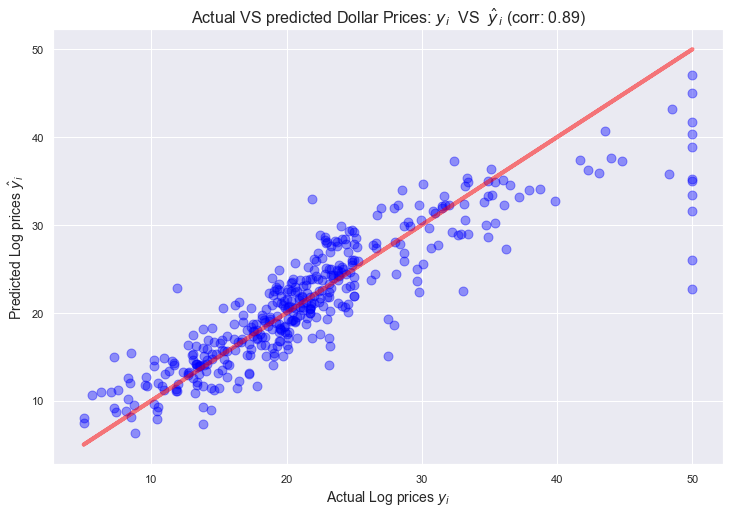

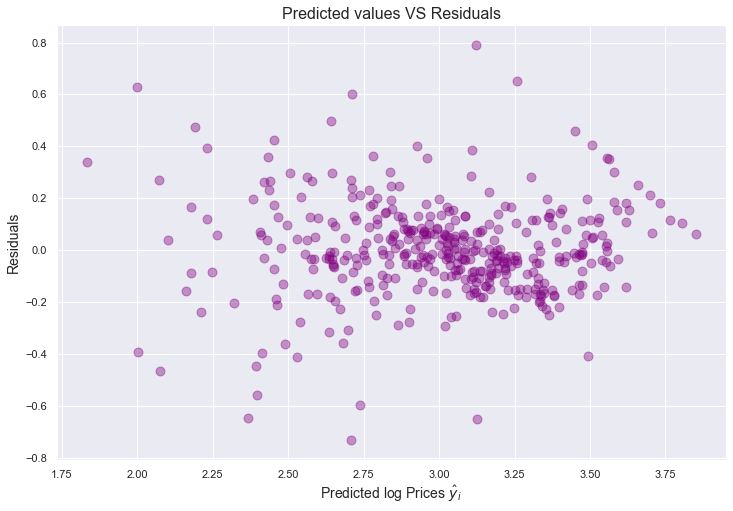

In [45]:
# Modified model: Transformed (using log prices) & simplified (Dropping two features)
prices = np.log(data["PRICE"]) # Use of Log Prices
features = data.drop(["PRICE", "INDUS", "AGE"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Stats model
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# RESIDUALS
# residuals = y_train - results.fittedvalues

# Graph of Actual VS Predicted values in Log Prices
plt.figure(figsize=[12, 8])
plt.scatter(y_train, results.fittedvalues, s=80, alpha=0.6)
plt.plot(y_train, y_train, linewidth=4, color='orange', alpha=0.8)
plt.title(f"Actual VS predicted Log Prices: $ y _i $  VS  $\hat y_i $ (corr: {round(y_train.corr(results.fittedvalues), 3)})", fontsize=16)
plt.xlabel(f"Actual Log prices $ y_i $", fontsize=14)
plt.ylabel(f"Predicted Log prices $ \hat y_i $", fontsize=14)

plt.show()

# Graph of Actual VS Predicted values in Dollar prices
plt.figure(figsize=[12, 8])
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, s=80, alpha=0.4, color='blue')
plt.plot(np.e**y_train, np.e**y_train, linewidth=4, color='red', alpha=0.5)
plt.title(f"Actual VS predicted Dollar Prices: $ y _i $  VS  $\hat y_i $ (corr: {round(y_train.corr(results.fittedvalues), 3)})", fontsize=16)
plt.xlabel(f"Actual Log prices $ y_i $", fontsize=14)
plt.ylabel(f"Predicted Log prices $ \hat y_i $", fontsize=14)

plt.show()

# Residuals vs predicted values
plt.figure(figsize=[12, 8])
plt.scatter(x=results.fittedvalues, y=results.resid, s=80, alpha=0.4, color='purple')
plt.title("Predicted values VS Residuals", fontsize=16)
plt.xlabel("Predicted log Prices $ \hat y_i $", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()


# Mean Squared Error and R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

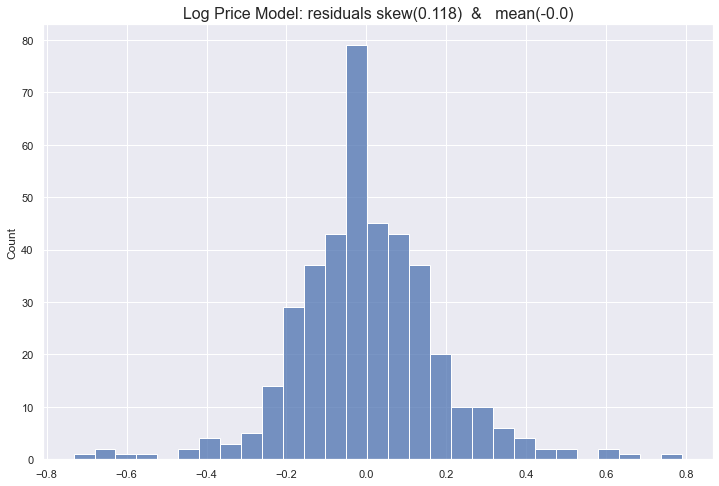

In [46]:
# Distribution of Residuals (Log Prices) - Checking for Normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=[12, 8])
sns.histplot(results.resid)
plt.title(f"Log Price Model: residuals skew({resid_skew})  &   mean({resid_mean})", fontsize=16)

plt.show()

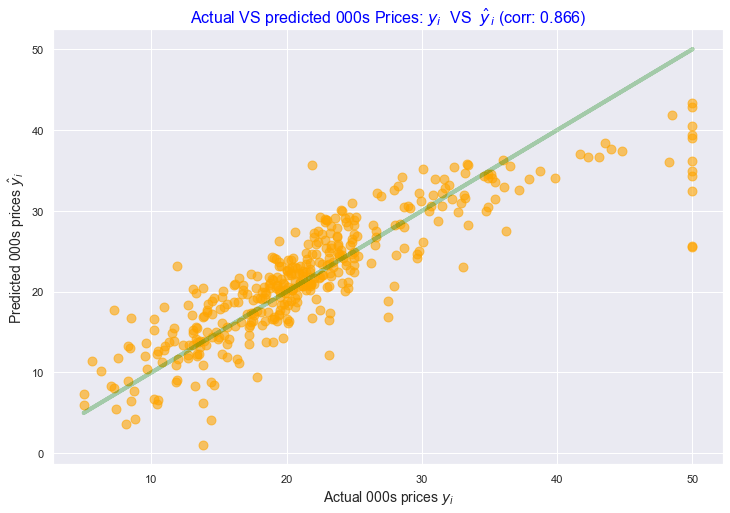

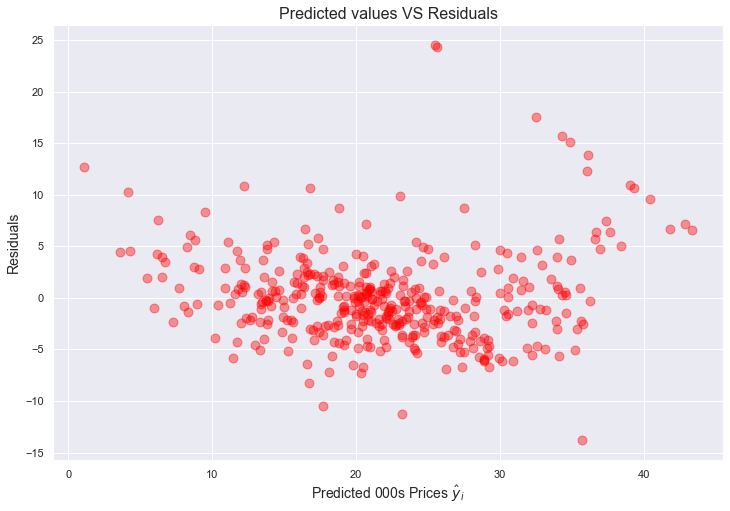

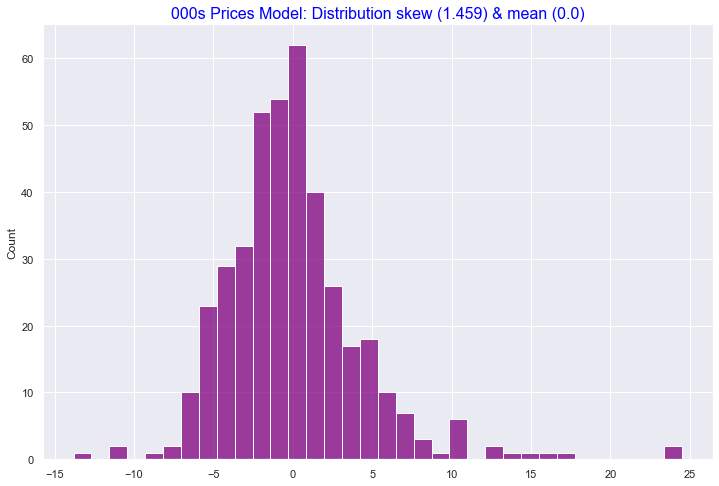

In [47]:
# Original Model: Using actual 000s prices
prices = data["PRICE"]# Use of Actual Prices
features = data.drop(["PRICE"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Stats model
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# RESIDUALS
#residuals = y_train - results.fittedvalues

# Graph of Actual VS Predicted values in Log Prices
plt.figure(figsize=[12, 8])
plt.scatter(y_train, results.fittedvalues, s=80, alpha=0.6, color="orange")
plt.plot(y_train, y_train, linewidth=4, color='green', alpha=0.3)
plt.title(f"Actual VS predicted 000s Prices: $ y _i $  VS  $\hat y_i $ (corr: {round(y_train.corr(results.fittedvalues), 3)})", fontsize=16, color="blue")
plt.xlabel(f"Actual 000s prices $ y_i $", fontsize=14)
plt.ylabel(f"Predicted 000s prices $ \hat y_i $", fontsize=14)

plt.show()

# 000s Price Residuals vs predicted values
plt.figure(figsize=[12, 8])
plt.scatter(x=results.fittedvalues, y=results.resid, s=80, alpha=0.4, color='red')
plt.title("Predicted values VS Residuals", fontsize=16)
plt.xlabel("Predicted 000s Prices $ \hat y_i $", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

# 000s Prices Residual Distrbution
plt.figure(figsize=[12, 8])
sns.histplot(results.resid, color="Purple")
plt.title(f"000s Prices Model: Distribution skew ({ round(results.resid.skew(),3) }) & mean ({ round(results.resid.mean(), 3) })", fontsize=16, color="blue")
plt.show()

# Mean Squared Error and R-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

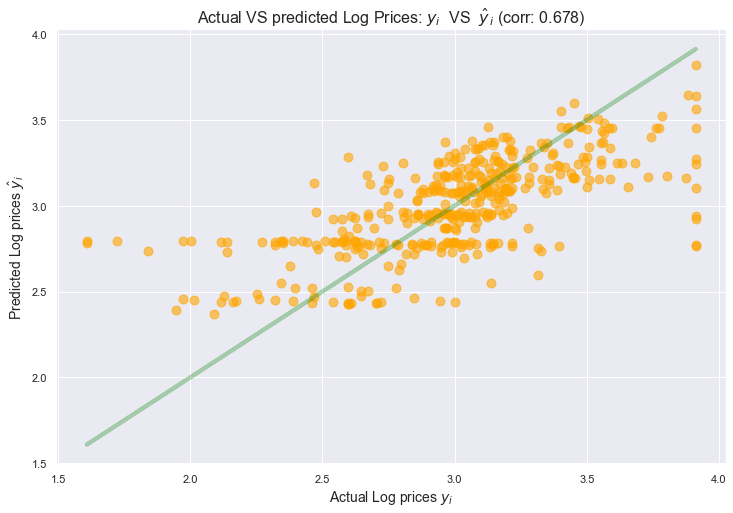

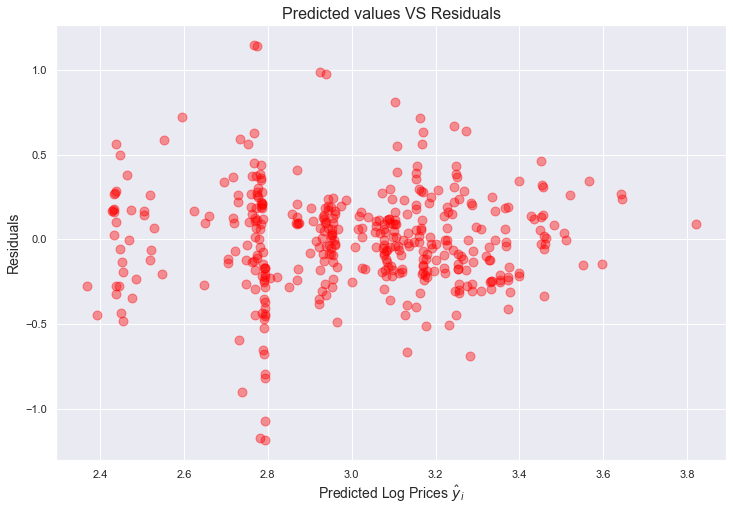

In [48]:
# Model Omitting KEY Features using log Prices
prices = np.log(data["PRICE"]) # Use of Log Prices
features = data.drop(["PRICE", "INDUS", "AGE", "LSTAT", "RM", "NOX", "CRIM"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Stats model
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# RESIDUALS
#residuals = y_train - results.fittedvalues

# Graph of Prices VS Predicted values in Log Prices
plt.figure(figsize=[12, 8])
plt.scatter(y_train, results.fittedvalues, s=80, alpha=0.6, color="orange")
plt.plot(y_train, y_train, linewidth=4, color='green', alpha=0.3)
plt.title(f"Actual VS predicted Log Prices: $ y _i $  VS  $\hat y_i $ (corr: {round(y_train.corr(results.fittedvalues), 3)})", fontsize=16)
plt.xlabel(f"Actual Log prices $ y_i $", fontsize=14)
plt.ylabel(f"Predicted Log prices $ \hat y_i $", fontsize=14)

plt.show()

# log Prices Residuals vs predicted values
plt.figure(figsize=[12, 8])
plt.scatter(x=results.fittedvalues, y=results.resid, s=80, alpha=0.4, color='red')
plt.title("Predicted values VS Residuals", fontsize=16)
plt.xlabel("Predicted Log Prices $ \hat y_i $", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

# Mean Squared Error and R-squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [49]:
DataFrame(data={"R-Squared": [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared], 
           "MSE": [reduced_log_mse, full_normal_mse, omitted_var_mse],
           "RMSE": np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
          index=["Reduced Log Model", "Full Normal Price", "Omitted Var Model"])

R-Squared     MSE      RMSE
Reduced Log Model      0.792   0.035  0.187083
Full Normal Price      0.750  19.921  4.463295
Omitted Var Model      0.460   0.090  0.300000

In [50]:
# Our Estimate for a House of 30,000.
# Calculating for upper and lower bound for 95% percent prediction ( Log Model )
print("1 s.d in log prices is", np.sqrt(reduced_log_mse))
print("2 s.d in log prices is", 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print("Upper bound in log prices for 95% Prediction interval is: ", upper_bound)
print("Upper bound in Normal Prices is $: ", np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print("Lower bound in log prices for 95% Prediction interval is: ", lower_bound)
print("Lower bound in Normal Prices is $: ", np.e**lower_bound * 1000)

1 s.d in log prices is 0.18708286933869708
2 s.d in log prices is 0.37416573867739417
Upper bound in log prices for 95% Prediction interval is:  3.7753631203395495
Upper bound in Normal Prices is $:  43613.34233239937
Lower bound in log prices for 95% Prediction interval is:  3.0270316429847615
Lower bound in Normal Prices is $:  20635.886906824155


In [52]:
1000 + 2*np.sqrt(reduced_log_mse)

1000.3741657386774

In [53]:
# Gather Data
boston_dataset = load_boston()
data = DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
features = data.drop(["INDUS", "AGE"], axis=1)

log_prices = np.log(boston_dataset.target)
target = DataFrame(data=log_prices, columns=["PRICE"])

In [54]:
CRIME_IDX = 0
ZN_IDX = 1
CHAS_IDX = 2
RM_IDX = 4
PTRATIO_IDX = 8

property_stats = np.ndarray(shape=(1, 11))
property_stats = features.mean().values.reshape(1, 11)

In [57]:
regr = LinearRegression()
regr.fit(features, target)

# Calculatig the MSE and RMSE
MSE = mean_squared_error(target, regr.predict(features))
RMSE = np.sqrt(mean_squared_error(target, regr.predict(features)))

print("MSE:", MSE)
print("RMSE:", RMSE)

MSE: 0.03516080084618688
RMSE: 0.18751213519713034


In [60]:
def get_log_estimate(nr_rooms,
                    student_per_classroom,
                    next_to_river=False,
                    high_confidence=True):

    # Configure Property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = student_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX] = 1
        
    else:
        property_stats[0][CHAS_IDX] = 0
        
        
    # Make Predictions
    log_estimate = regr.predict(property_stats)[0][0]
    
    # Calculate Range
    if high_confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
        
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
    
    return log_estimate, upper_bound, lower_bound, interval

In [61]:
get_log_estimate(3, 20, next_to_river=True, high_confidence=False)

(2.776758191480399, 2.9642703266775294, 2.589246056283269, 68)

In [62]:
np.median(boston_dataset.target)

21.2

In [94]:
ZILLOW_MEDIAN_PRICE = 583.3
SCALE_FACTOR = ZILLOW_MEDIAN_PRICE / np.median(boston_dataset.target)

In [148]:
log_est, upper, lower, conf = get_log_estimate(nr_rooms=10, student_per_classroom=20,
                                          next_to_river=True, high_confidence=False)

# Converting Log Price to Today's Dollar Price
dollar_log_est = np.e**log_est * 1000 * SCALE_FACTOR
dollar_upper_est = np.e**upper * 1000 * SCALE_FACTOR
dollar_lower_est = np.e**lower * 1000 * SCALE_FACTOR

# Rounding Dollar estimate to the Nearest Thousands
rounded_est = np.around(dollar_log_est, -3)
round_upper = np.around(dollar_upper_est, -3) / 2

print("THE ESTIMATED PROPERTY PRICE: ", rounded_est)
print(f"At {conf}% Confidence, the valuation Range is:")
print(f"USD {rounded_upper} at the UPPER and USD {rounded_lower} at the LOWER")


THE ESTIMATED PROPERTY PRICE:  834000.0
At 68% Confidence, the valuation Range is:
USD 1006000.0 at the UPPER and USD 691000.0 at the LOWER


In [144]:
rounded_lower_est

691000.0